# Implement KMeans from scratch

In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [4]:
datafile = '/Users/flint/Data/milan/Airbnb_Milan.csv'
conv = {
    'review_scores_rating': lambda x: int(x) / 10,
    'review_scores_accuracy': lambda x: int(x) / 10,
    'review_scores_cleanliness': lambda x: int(x) / 10,
    'review_scores_checkin': lambda x: int(x) / 10,
    'review_scores_communication': lambda x: int(x) / 10,
    'review_scores_location': lambda x: int(x) / 10,
    'review_scores_value': lambda x: int(x) / 10,
}
milan = pd.read_csv(datafile, index_col=0, converters=conv)

## Clustering by daily price and review_scores_rating

In [5]:
import matplotlib.pyplot as plt

In [6]:
X = milan[['daily_price', 'review_scores_rating']]

## KMEANS

In [28]:
from algorithms import NaiveKMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler

In [29]:
k = 3
nk = NaiveKMeans(k=k)

In [30]:
nX = X.to_numpy()
nX = MinMaxScaler().fit_transform(nX)

In [31]:
nk.fit(nX)

In [32]:
y_pred = nk.predict(nX)

## Visualization

In [33]:
from IPython.display import clear_output
import time

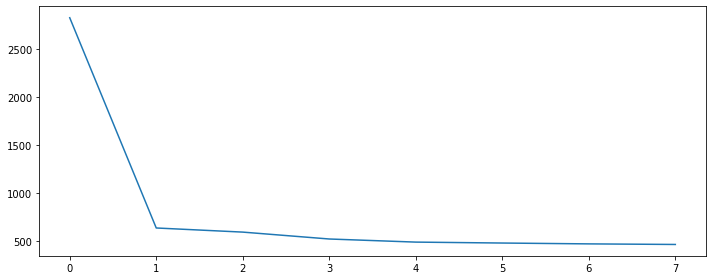

In [34]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(nk.history)
plt.tight_layout()
plt.show()

In [39]:
def plot(i):
    fig, ax = plt.subplots(figsize=(14, 6), ncols=2)
    ax[0].scatter(nX[:,0], nX[:,1], c=y_pred, alpha=0.4)
    ax[0].scatter(nk.centroids[:,0], nk.centroids[:,1], c='red', alpha=1.0, s=100)
    ax[1].scatter(nX[:,0], nX[:,1], c=nk.assignment_history[i], 
                  alpha=0.4)
    ax[1].scatter(nk.centroids_history[i][:,0], 
                  nk.centroids_history[i][:,1], c='red', alpha=1.0, s=100)    
    plt.tight_layout()
    plt.show()

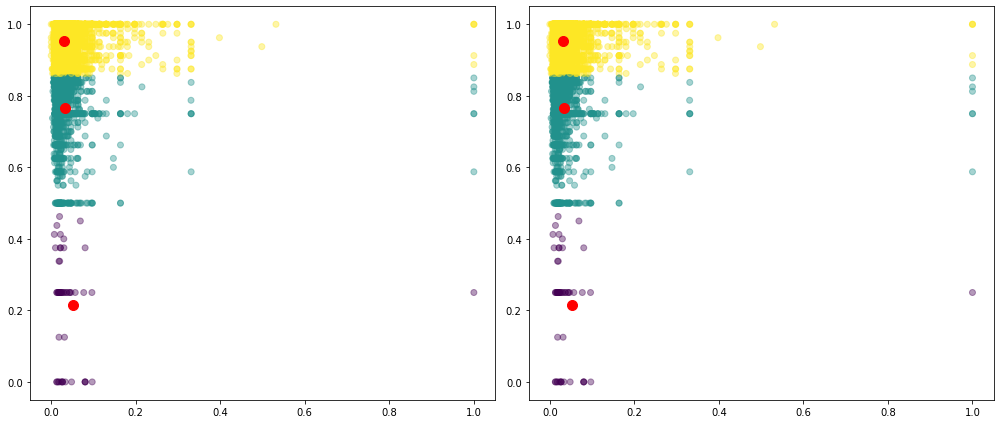

In [40]:
for i in range(len(nk.history)):
    clear_output(wait=True)
    plot(i)
    time.sleep(1)